<a href="https://colab.research.google.com/github/pirategiri/DataScience/blob/main/linearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/gdrive')
import os

Mounted at /gdrive


In [3]:
data_path = "/gdrive/My Drive/DagDataScienceMaterial/data_folder/optimization"
data_file = os.path.join(data_path, "boston_train.csv")
df = pd.read_csv(data_file)
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [11]:
y=df['medv']
X = df.drop(["ID", "medv"], axis=1).values
X=(X-X.mean())/X.std()
X = np.c_[np.ones(X.shape[0]), X] # x0 =1 



In [26]:
import numpy as np

class LinearRegression :
  def __init__(self,alpha=0.01):
    self.alpha=alpha #learning rate
    self.hist_loss=[] #empty list of loss history
    self.hist_param=[] #empty list for parameter updates

  def fit_gd(self,x, y, iterations):

      """
      This fit function works for a gradident decent
      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size

      for it in range(iterations):
        
        prediction = np.dot(x, self.theta) # h(x) = thetaT.X  (z in logitic regression )
        error = prediction - y
        loss = 1/(2*m) * np.dot(error.T, error)  #  Matrix form error^2
        self.hist_loss.append(loss)
        self.theta = self.theta - (self.alpha * (1/m) * np.dot(x.T, error))
        if it%50 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

  def fit_sgd(self,x, y, iterations):
      """
      This fit function works for a  Stocashtic gradident Decent, where we uptimized the parameters using 
      single observation 

      x : input feature  (m , d), where m = number of data points and d = dimension of the data 
      y : target value (m ,)
      interations : int , number of interation point) 
      """
      self.theta =  np.random.rand(x.shape[1])
      m = y.size
      for it in range(iterations):
        loss = 0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)  # updating  with one sample at a time
            x_i = x[rand_ind,:] 
            y_i = y[rand_ind]
            prediction = np.dot(x_i, self.theta)
            error = prediction - y_i
            loss =+1/2 * np.dot(error.T, error) 
            self.theta = self.theta - (self.alpha * np.dot(x_i.T, error))
        self.hist_loss.append(loss)
        if it%200 ==0:
          print(f"it: {it}, train_loss: {loss})")
        self.hist_param.append(self.theta)

  def fit_batch_sgd(self, x, y, iterations, batch_size = 5):
        """
        This fit function works for a  Stocashtic gradident Decent with batch, where we uptimized the parameters using handful of samples. It is very efficient 
        for large dataset
      
        x : input feature  (m , d), where m = number of data points and d = dimension of the data 
        y : target value (m ,)
        interations : int , number of interation point) 
        """ 
        self.theta =  np.random.rand(x.shape[1])
        m = y.size
        n_batch = int(x.shape[0]/batch_size)
        for it in range(iterations):
              rand_indices = np.random.choice(range(m), size= batch_size) 
              x_b = x[rand_indices] 
              y_b = y[rand_indices]
              prediction = np.dot(x_b, self.theta)
              error = prediction - y_b
              loss =+1/(2*batch_size) * np.dot(error.T, error) 
              self.theta = self.theta - (self.alpha * np.dot(x_b.T, error))
              self.hist_loss.append(loss)
              if it%100 ==0:
                print(f"it: {it}, train_loss: {loss})")
              self.hist_param.append(self.theta)

    
  def predict(self, X):
      return np.dot(X, self.theta)

    

In [36]:
alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LinearRegression(alpha= alpha) 
lm.fit_gd(X, y, iterations=iterations)
yhat = lm.predict(X)

it: 0, train_loss: 296.75366693984836)
it: 50, train_loss: 129.83563546809557)
it: 100, train_loss: 81.26645302310814)
it: 150, train_loss: 65.8085763041782)
it: 200, train_loss: 59.75648693578781)
it: 250, train_loss: 56.50213875877579)
it: 300, train_loss: 54.189881969718726)
it: 350, train_loss: 52.28650317774356)
it: 400, train_loss: 50.62808676803109)
it: 450, train_loss: 49.15501028925504)
it: 500, train_loss: 47.83813887049288)
it: 550, train_loss: 46.65815803919686)
it: 600, train_loss: 45.5996868917263)
it: 650, train_loss: 44.64951312301884)
it: 700, train_loss: 43.79598710242998)
it: 750, train_loss: 43.02875037344568)
it: 800, train_loss: 42.33856814682267)
it: 850, train_loss: 41.71720057819338)
it: 900, train_loss: 41.15729365088524)
it: 950, train_loss: 40.65228338686201)
it: 1000, train_loss: 40.19631079509759)
it: 1050, train_loss: 39.78414608182989)
it: 1100, train_loss: 39.41112103815244)
it: 1150, train_loss: 39.07306870151344)
it: 1200, train_loss: 38.7662695027011

Text(0.5, 0, '$predicted  price$')

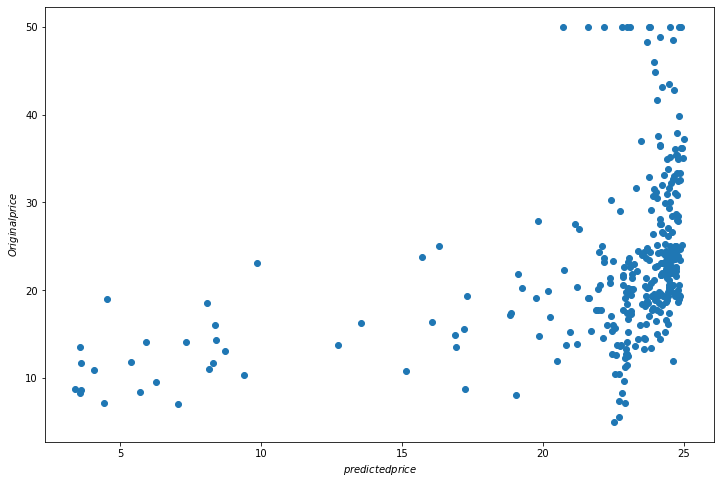

In [37]:
plt.figure(figsize=(12, 8))
plt.scatter(yhat, y)
plt.ylabel('$Original  price$')
plt.xlabel('$predicted  price$')

Text(0, 0.5, '$J(\\theta)$')

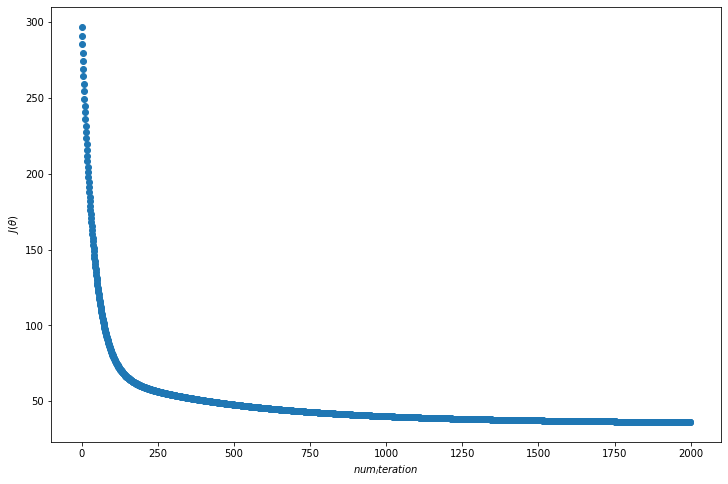

In [38]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

In [40]:
alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LinearRegression(alpha= alpha) 
lm.fit_sgd(X, y, iterations=iterations)
yhat = lm.predict(X)

it: 0, train_loss: 1.2038723798330129)
it: 200, train_loss: 2.092282874329097)
it: 400, train_loss: 1.950290770820353)
it: 600, train_loss: 3.605773129100813)
it: 800, train_loss: 4.2644380524711725)
it: 1000, train_loss: 0.8666864442446675)
it: 1200, train_loss: 10.102635380152739)
it: 1400, train_loss: 4.042772598883553)
it: 1600, train_loss: 2.595017901377408)
it: 1800, train_loss: 28.81661670074269)


Text(0, 0.5, '$J(\\theta)$')

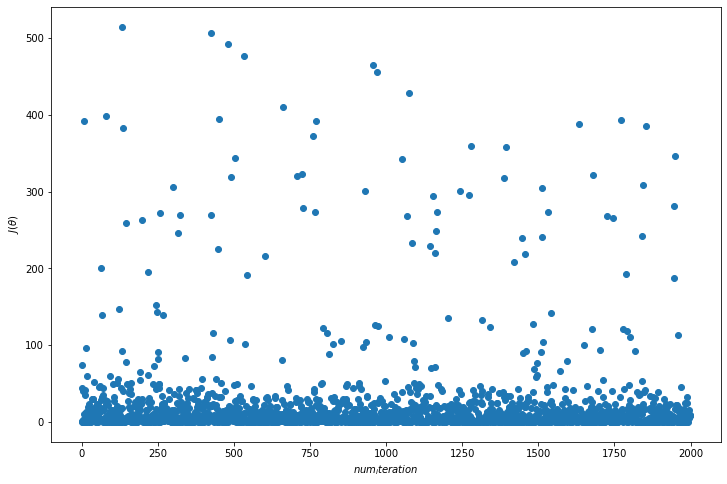

In [41]:
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')

In [42]:
alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
np.random.seed(123) #Set the seed
lm =LinearRegression(alpha= alpha) 
lm.fit_batch_sgd(X, y, iterations=iterations)
yhat = lm.predict(X)

it: 0, train_loss: 189.01035853379472)
it: 100, train_loss: 68.98784479616849)
it: 200, train_loss: 35.980503938408255)
it: 300, train_loss: 15.609724677526447)
it: 400, train_loss: 15.730861591396124)
it: 500, train_loss: 75.34081680784412)
it: 600, train_loss: 26.289519925823697)
it: 700, train_loss: 79.21913844814105)
it: 800, train_loss: 10.365017641512424)
it: 900, train_loss: 79.82415765164284)
it: 1000, train_loss: 10.061056205980552)
it: 1100, train_loss: 31.093132708586523)
it: 1200, train_loss: 24.199448225081237)
it: 1300, train_loss: 8.256854553436007)
it: 1400, train_loss: 21.572756845937604)
it: 1500, train_loss: 40.463589713373665)
it: 1600, train_loss: 9.646078865507967)
it: 1700, train_loss: 9.246337546108379)
it: 1800, train_loss: 90.81163265488877)
it: 1900, train_loss: 20.384696296307723)


Text(0, 0.5, '$J(\\theta)$')

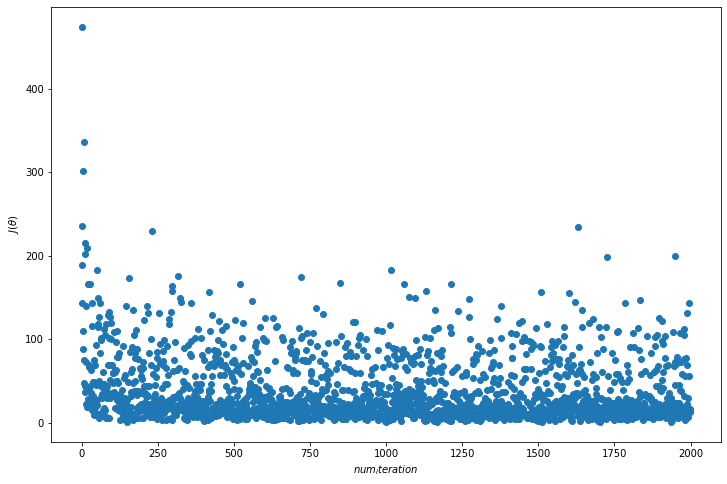

In [43]:
#theta2
plt.figure(figsize=(12, 8))
loss_history = lm.hist_loss
num_iternation = list(range(len(loss_history)))
plt.scatter(num_iternation, loss_history)
plt.xlabel('$num_iteration$')
plt.ylabel('$J(\\theta)$')